## Predict the precentage based on study hours

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read data

data = pd.read_csv('raw.githubusercontent.com_AdiPersonalWorks_Random_master_student_scores - student_scores.csv')

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#EDA

data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

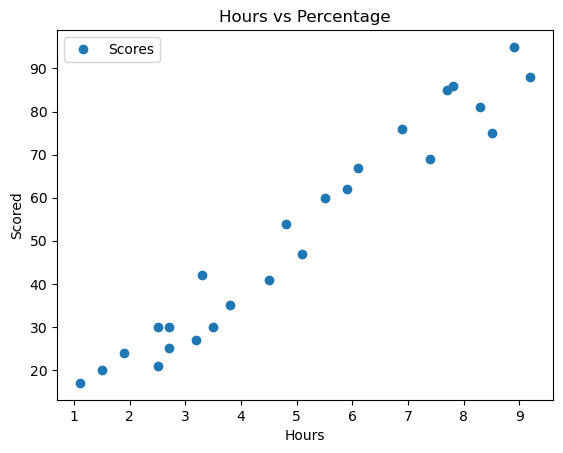

In [8]:
#plotting the variables

data.plot(x='Hours', y='Scores', style='o')  

plt.title('Hours vs Percentage')  
plt.xlabel('Hours')  
plt.ylabel('Scored')  

plt.show()

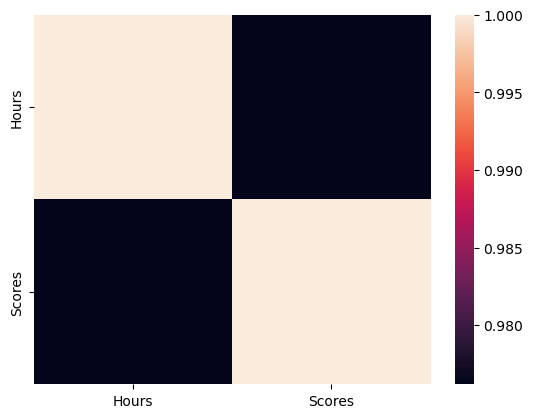

In [9]:
import seaborn as sns

sns.heatmap(data.corr(), cbar = True)
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between 
the number of hours studied and percentage of score.

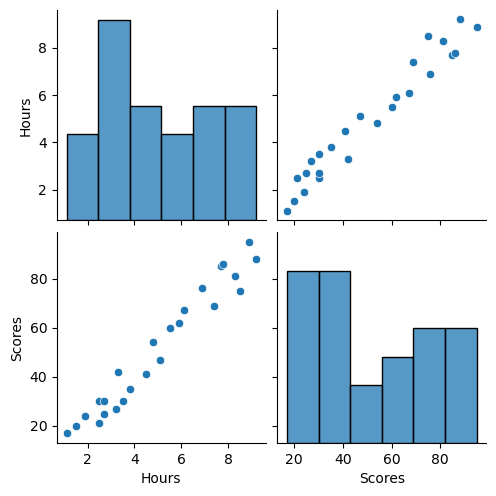

In [10]:
sns.pairplot(data)
plt.show()

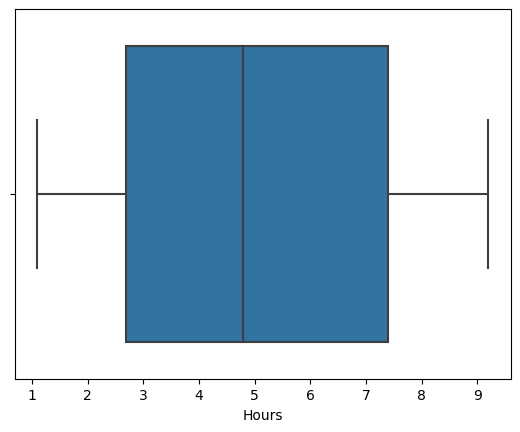

In [11]:
# check outliers
sns.boxplot(data = data, x= data['Hours'])
plt.show()

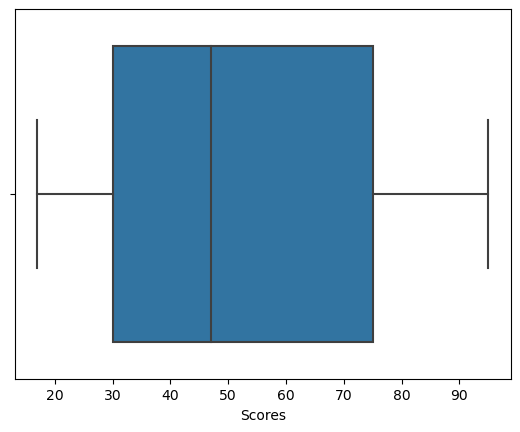

In [12]:
sns.boxplot(data = data, x= data['Scores'])
plt.show()

#Scaling the dataset

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

columns = ['Hours','Scores']

data[columns] = sc.fit_transform(data[columns])

data.head(5)

Modeling 

In [13]:
#train/test split

x = data.drop(['Scores'], axis=1)
y = data['Scores']

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=100)

In [14]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,r2_score
lr=LinearRegression()

lr=LinearRegression()
lr.fit(xtrain,ytrain)

ypred_train =lr.predict(xtrain)
ypred_test = lr.predict(xtest)

mse_train = mean_squared_error(ytrain,ypred_train)
mse_test=mean_squared_error(ytest,ypred_test)

rmse_train= np.sqrt(mse_train)
rmse_test= np.sqrt(mse_test)

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

result_lr=[r2_train,r2_test,rmse_train,rmse_test]
result_lr

#evaluation metrics = r2_score, root mean squared error

[0.9570735354094693, 0.9309458862687437, 5.55451986094803, 5.0673878451608445]

In [15]:
df1 = pd.DataFrame({'Actual': ytest, 'Predicted': ypred_test})  
df1

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


In [24]:
#test
hours = np.array([9.25])
nohours = hours.reshape(1, -1)
hour_pred =lr.predict(nohours)

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(hour_pred[0]))

No of Hours = [9.25]
Predicted Score = 92.80850057353504


C:\Users\Vidhya Priya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
#absolute mean squared error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest,ypred_test)
mae

4.762517892332275